<a href="https://colab.research.google.com/github/Yash22222/IBM-CSRBOX-Internship-Project/blob/main/IBM_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **P-1:- WEB SCRAPPING FOR AIR INDIA'S SENTIMENT ANALYSIS**

## **Web Scrapping**

#### Web scraping is a technique used to extract data from websites automatically. It involves writing code to navigate through web pages, locate specific elements, and extract relevant information. Web scraping is commonly used in data mining, data analysis, and gathering data for research or business purposes.

In [1]:
# Importing Libraries For Web Scrapping

import requests
from bs4 import BeautifulSoup
import pandas as pd

#### Requests is a popular Python library that allows you to send HTTP/1.1 requests easily. It simplifies the process of making HTTP requests to fetch data from URLs.

#### BeautifulSoup is a Python library used to parse HTML and XML documents and extract information from them. It creates a parse tree from the HTML/XML source, which can be used to navigate and search for specific elements in the document using various

#### Pandas is a powerful open-source Python library widely used for data manipulation and analysis. It provides data structures and functions for efficiently working with structured data, making it a fundamental tool for data scientists and analysts.

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/air-india/"
pages = 10
page_size = 100

data = []
for i in range(1, pages + 1):

    print(f"Scraping page {i}")
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        data.append(para.get_text())

    print(f"   ---> {len(data)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["data"] = data
df.head()

,data
0,✅ Trip Verified | Had one of the worst experi...
1,"Not Verified | Bad treatment, took Air India ..."
2,✅ Trip Verified | Requested a gluten free mea...
3,Not Verified | Worst planes I have ever been i...
4,Not Verified | I have been flying for the past...


In [4]:
df.to_csv("data.csv")
df.head()

,data
0,✅ Trip Verified | Had one of the worst experi...
1,"Not Verified | Bad treatment, took Air India ..."
2,✅ Trip Verified | Requested a gluten free mea...
3,Not Verified | Worst planes I have ever been i...
4,Not Verified | I have been flying for the past...


## **Data Preprocessing**

#### Data preprocessing is an essential step in the data science and machine learning pipeline. It involves cleaning, transforming, and preparing the raw data into a format suitable for analysis and building predictive models.

In [5]:
# Remove sentences before '|' in data column
df.data= df.data.str.split('|',expand=True)[1]
df

,data
0,Had one of the worst experiences being a fre...
1,"Bad treatment, took Air India flt no. 129 on..."
2,Requested a gluten free meal and was given a...
3,Worst planes I have ever been in while taking...
4,I have been flying for the past 21 years and ...
...,...
995,None
996,None
997,None
998,None


In [6]:
# Remove All Special Characters

# import request as re
import re

def clean(text):
    text = re.sub('[^A-Za-z]+]', ' ', str(text))
    return text

df['clean_data'] = df['data'].apply(clean)
df.head()

,data,clean_data
0,Had one of the worst experiences being a fre...,Had one of the worst experiences being a fre...
1,"Bad treatment, took Air India flt no. 129 on...","Bad treatment, took Air India flt no. 129 on..."
2,Requested a gluten free meal and was given a...,Requested a gluten free meal and was given a...
3,Worst planes I have ever been in while taking...,Worst planes I have ever been in while taking...
4,I have been flying for the past 21 years and ...,I have been flying for the past 21 years and ...


## **Tokenization**

#### Tokenization is an essential step in NLP and text processing because it helps convert unstructured text data into a format that can be used for various language processing tasks like sentiment analysis, machine translation, text classification, and more. Each token represents a discrete unit of meaning or information.

In [7]:
# Importing Libraries

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## **POS Tagging**

### Part-of-speech (POS) tagging, also known as grammatical tagging or word category disambiguation, is the process of assigning a part-of-speech tag to each word in a sentence or text. it helps in understanding the grammatical structure of a sentence, which is crucial for many NLP applications like information extraction, sentiment analysis, machine translation, and more.

In [8]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [9]:
# Converting each token into Tuple
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist


df['POS tagged'] = df['clean_data'].apply(token_stop_pos)
df.head()

,data,clean_data,POS tagged
0,Had one of the worst experiences being a fre...,Had one of the worst experiences being a fre...,"[(one, None), (worst, a), (experiences, n), (f..."
1,"Bad treatment, took Air India flt no. 129 on...","Bad treatment, took Air India flt no. 129 on...","[(Bad, n), (treatment, n), (,, None), (took, v..."
2,Requested a gluten free meal and was given a...,Requested a gluten free meal and was given a...,"[(Requested, v), (gluten, a), (free, a), (meal..."
3,Worst planes I have ever been in while taking...,Worst planes I have ever been in while taking...,"[(Worst, n), (planes, n), (ever, r), (taking, ..."
4,I have been flying for the past 21 years and ...,I have been flying for the past 21 years and ...,"[(flying, v), (past, a), (21, None), (years, n..."


## **Lemmatization (Lemma)**

#### In natural language processing (NLP), lemma refers to the base or root form of a word. It is the canonical or dictionary form of a word, to which inflections and variations are added. For example, the lemma of the word "running" is "run," and the lemma of "cats" is "cat."

In [10]:
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

In [11]:
# grouping the words
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew


df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,data,clean_data,POS tagged,Lemma
0,Had one of the worst experiences being a fre...,Had one of the worst experiences being a fre...,"[(one, None), (worst, a), (experiences, n), (f...",one bad experience frequent flyer . flight B...
1,"Bad treatment, took Air India flt no. 129 on...","Bad treatment, took Air India flt no. 129 on...","[(Bad, n), (treatment, n), (,, None), (took, v...","Bad treatment , take Air India flt . 129 15t..."
2,Requested a gluten free meal and was given a...,Requested a gluten free meal and was given a...,"[(Requested, v), (gluten, a), (free, a), (meal...",Requested gluten free meal give regular meal...
3,Worst planes I have ever been in while taking...,Worst planes I have ever been in while taking...,"[(Worst, n), (planes, n), (ever, r), (taking, ...",Worst plane ever take international flight ....
4,I have been flying for the past 21 years and ...,I have been flying for the past 21 years and ...,"[(flying, v), (past, a), (21, None), (years, n...",fly past 21 year never see poorly condition ...


In [12]:
df[['data','Lemma']]

,data,Lemma
0,Had one of the worst experiences being a fre...,one bad experience frequent flyer . flight B...
1,"Bad treatment, took Air India flt no. 129 on...","Bad treatment , take Air India flt . 129 15t..."
2,Requested a gluten free meal and was given a...,Requested gluten free meal give regular meal...
3,Worst planes I have ever been in while taking...,Worst plane ever take international flight ....
4,I have been flying for the past 21 years and ...,fly past 21 year never see poorly condition ...
...,...,...
995,None,None
996,None,None
997,None,None
998,None,None


## **Sentiment Analysis**

#### Sentiment analysis, also known as opinion mining, is a natural language processing (NLP) technique used to determine the sentiment or emotional tone of a piece of text, such as a sentence, paragraph, or document. The goal of sentiment analysis is to identify whether the text expresses a positive, negative, or neutral sentiment towards a particular subject, product, service, or topic.

### VADER - Valence Aware Dictionary for Sentiment Reasoning

#### VADER (Valence Aware Dictionary for Sentiment Reasoning) is a lexicon and rule-based sentiment analysis tool that is specifically designed for social media text. It is a part of the Natural Language Toolkit (NLTK) library in Python. The VADER model is widely used for sentiment analysis tasks, especially on short and informal text like tweets, Facebook posts, and online reviews.

In [13]:
# Importing Libraries
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [14]:
# For Calculating Sentiment Analysis
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

In [15]:
# Function to Analyzing
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'

df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,data,clean_data,POS tagged,Lemma,Sentiment,Analysis
0,Had one of the worst experiences being a fre...,Had one of the worst experiences being a fre...,"[(one, None), (worst, a), (experiences, n), (f...",one bad experience frequent flyer . flight B...,-0.5095,Negative
1,"Bad treatment, took Air India flt no. 129 on...","Bad treatment, took Air India flt no. 129 on...","[(Bad, n), (treatment, n), (,, None), (took, v...","Bad treatment , take Air India flt . 129 15t...",-0.8934,Negative
2,Requested a gluten free meal and was given a...,Requested a gluten free meal and was given a...,"[(Requested, v), (gluten, a), (free, a), (meal...",Requested gluten free meal give regular meal...,0.6249,Positive
3,Worst planes I have ever been in while taking...,Worst planes I have ever been in while taking...,"[(Worst, n), (planes, n), (ever, r), (taking, ...",Worst plane ever take international flight ....,0.7843,Positive
4,I have been flying for the past 21 years and ...,I have been flying for the past 21 years and ...,"[(flying, v), (past, a), (21, None), (years, n...",fly past 21 year never see poorly condition ...,-0.8134,Negative


In [16]:
# Final Analysis
vader_counts = df['Analysis'].value_counts()
vader_counts

Negative    386
Neutral     319
Positive    295
Name: Analysis, dtype: int64

## **Data Visualization Using Matplotlib**

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

#### Matplotlib is a popular data visualization library in Python. It provides a wide variety of functions and tools for creating high-quality plots and charts. With Matplotlib, you can create line plots, scatter plots, bar plots, histograms, pie charts, 3D plots, and more.

([<matplotlib.patches.Wedge at 0x7f979b518190>,
 [Text(0.38558772828960897, 1.0302048843761415, 'Negative'),
  Text(-1.0553536990573813, -0.31020730147097164, 'Neutral'),
  Text(0.8105673486638398, -1.079574255565625, 'Positive')],
 [Text(0.21032057906705942, 0.5619299369324408, '38.6%'),
  Text(-0.5756474722131171, -0.16920398262052996, '31.9%'),
  Text(0.5103572195290843, -0.6797319386894675, '29.5%')])

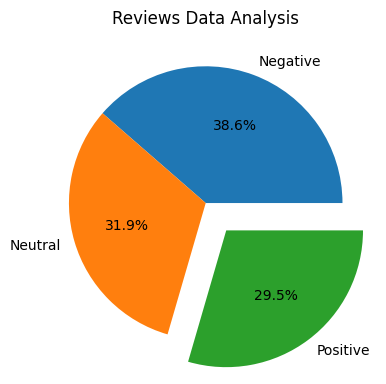

In [18]:
plt.figure(figsize=(15,7))
plt.subplot(1, 3, 2)
plt.title('Reviews Data Analysis')
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

## **Coverting To CSV File**

In [19]:
df.to_csv("Air_India_Data.csv")

## **Data Viz Using WordCloud**

#### WordCloud is a popular Python library used for visualizing text data in the form of word clouds. A word cloud is a graphical representation of the most frequent words in a given text corpus, where the size of each word is proportional to its frequency in the text.

In [20]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

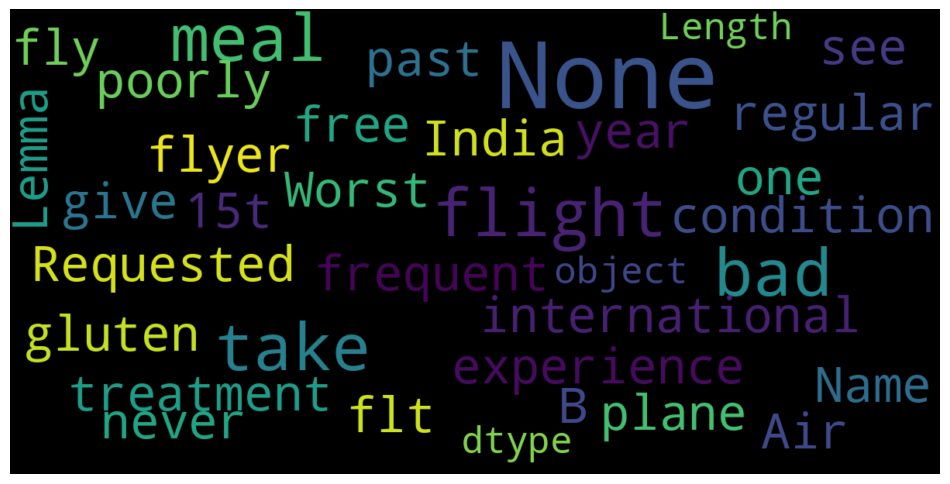

In [21]:
import wordcloud
def show_wordcloud(data):
  wordcloud = WordCloud(
      background_color = 'black',
      stopwords=stopwords,
      max_words = 200,
      max_font_size = 40,
      scale = 3,
      random_state = 1)

  wordcloud = wordcloud.generate(str(data))

  fig = plt.figure(1, figsize = (12, 32))
  plt.axis('off')

  plt.imshow(wordcloud, interpolation = 'Bilinear')
  plt.show()

show_wordcloud(df.Lemma)

# **P2:- PREDICTIVE MODELING ON CUSTOMERS DATA**

### The predictive model is the quality of the data you use to train the machine learning algorithms. you must manipulate and prepare the provided customers' overall data so that you can build a high-quality predictive model. With the predictive model, it is important to interpret the results in order to understand how “predictive” the data really was and can feasibly use it to predict the target outcome.

 ### Here We started From Exploratory Data Analysis

 #### Exploratory Data Analysis is a crucial step in the data analysis process, where the primary goal is to understand the data, gain insights, and identify patterns or relationships between variables.

In [22]:
!pip install warn

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import chardet

In [24]:
data = 'cleaned_output_data.csv'

In [25]:
with open('cleaned_output_data.csv', 'rb') as rawdata:
  result = chardet.detect(rawdata.read(100000))

print(result)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [26]:
df = pd.read_csv(data, encoding= 'utf-8')

In [27]:
df.head()

,rating,header,customer_name,country,date,is_verified,review,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_and_beverages,inflight_entertainment,ground_service,wifi_and_connectivity,value_for_money,recommended
0,1,"""was given a regular meal""",Simon Taylor,United Kingdom,22nd July 2023,Trip Verified,✅ Trip Verified | Requested a gluten free mea...,Solo Leisure,Economy Class,Gatwick to Goa,May-23,3.0,2.0,1.0,2.0,3.0,NaN,1,no
1,1,"""both times it was torture""",Rohit Kaushal,Australia,20th July 2023,Not Verified,Not Verified | Worst planes I have ever been i...,Business,Economy Class,Melbourne to Delhi,May-23,1.0,1.0,3.0,NaN,1.0,NaN,1,no
2,1,"""flight was disgusting and dirty""",Ann Benny Alackal,United States,18th July 2023,Not Verified,Not Verified | I have been flying for the past...,Couple Leisure,Economy Class,NaN,Jul-23,1.0,5.0,1.0,NaN,1.0,NaN,1,no
3,1,"""gotten progressively worse""",R Singh,United States,18th July 2023,Trip Verified,✅ Trip Verified | Sometime around 2017 I got t...,Solo Leisure,Economy Class,Kolkata to Newark via Delhi,Jun-23,1.0,1.0,1.0,1.0,1.0,1.0,1,no
4,2,"""most disappointed""",S Sethi,India,17th July 2023,Not Verified,Not Verified | My flight was supposed to depa...,Solo Leisure,Economy Class,Delhi to Singapore,Jul-23,2.0,2.0,1.0,1.0,2.0,NaN,2,no


In [28]:
df.dtypes

rating                      int64
header                     object
customer_name              object
country                    object
date                       object
is_verified                object
review                     object
type_of_traveller          object
seat_type                  object
route                      object
date_flown                 object
seat_comfort              float64
cabin_staff_service       float64
food_and_beverages        float64
inflight_entertainment    float64
ground_service            float64
wifi_and_connectivity     float64
value_for_money             int64
recommended                object
dtype: object

In [29]:
df.shape

(876, 19)

In [30]:
df.isnull().sum()

rating                      0
header                      0
customer_name               0
country                     0
date                        0
is_verified               224
review                      0
type_of_traveller           0
seat_type                   0
route                       2
date_flown                  1
seat_comfort               54
cabin_staff_service        57
food_and_beverages        119
inflight_entertainment    282
ground_service             32
wifi_and_connectivity     574
value_for_money             0
recommended                 3
dtype: int64

In [31]:
df.value_for_money.value_counts()

1    405
5    147
2    120
4    108
3     96
Name: value_for_money, dtype: int64

#### Mutual Information (MI) score graphs are used to visualize the relevance of each feature in the dataset with respect to the target variable. Mutual information is a measure of the dependency between two variables, and in the context of feature selection

In [32]:
X = df.drop('value_for_money', axis=1)
y = df.value_for_money

In [33]:
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

X.dropna(inplace=True)

X.dtypes

rating                      int64
header                      int64
customer_name               int64
country                     int64
date                        int64
is_verified                 int64
review                      int64
type_of_traveller           int64
seat_type                   int64
route                       int64
date_flown                  int64
seat_comfort              float64
cabin_staff_service       float64
food_and_beverages        float64
inflight_entertainment    float64
ground_service            float64
wifi_and_connectivity     float64
recommended                 int64
dtype: object

In [34]:
from sklearn.feature_selection import mutual_info_classif

# Check the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Ensure X and y have the same number of samples
if X.shape[0] != y.shape[0]:
    # If the number of samples is not consistent, take the common samples between X and y
    common_samples = X.index.intersection(y.index)
    X = X.loc[common_samples]
    y = y.loc[common_samples]
    print("After correction - Shape of X:", X.shape)
    print("After correction - Shape of y:", y.shape)

# Calculate mutual information scores
mi_score = mutual_info_classif(X, y)

# Create a pandas Series with feature names as index
mi_score = pd.Series(mi_score, name="MI Score", index=X.columns)

# Sort the features based on mutual information score in descending order
mi_score = mi_score.sort_values(ascending=False)

Shape of X: (292, 18)
Shape of y: (876,)
After correction - Shape of X: (292, 18)
After correction - Shape of y: (292,)


In [35]:
mi_score

rating                    0.432832
seat_comfort              0.283638
food_and_beverages        0.270559
inflight_entertainment    0.266207
ground_service            0.247986
cabin_staff_service       0.183500
wifi_and_connectivity     0.173546
date_flown                0.103891
date                      0.076791
review                    0.074901
header                    0.073022
customer_name             0.068790
route                     0.067449
seat_type                 0.044502
recommended               0.032963
country                   0.024304
type_of_traveller         0.019045
is_verified               0.015864
Name: MI Score, dtype: float64

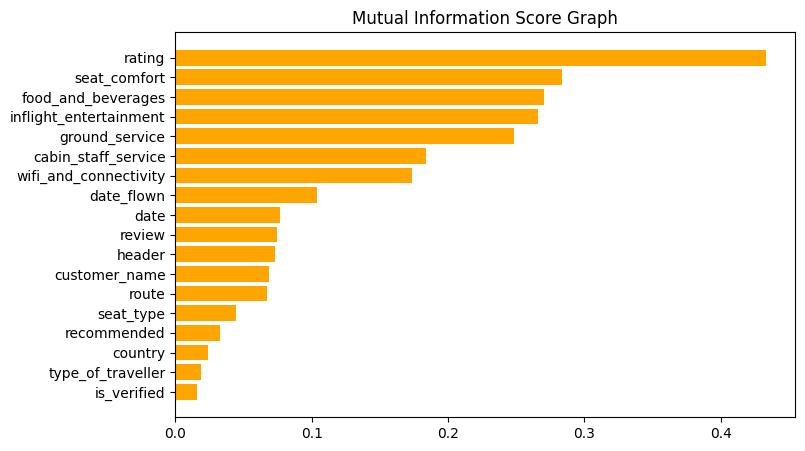

In [36]:
def plot_mi_score(score, color='blue'):
    score = score.sort_values(ascending=True)
    width = np.arange(len(score))
    ticks = list(score.index)
    plt.barh(width, score, color=color)  # Set the color here
    plt.yticks(width, ticks)
    plt.title("Mutual Information Score Graph")

# Example usage with a different color (e.g., 'orange')
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_score(mi_score, color='orange')
plt.show()

In [37]:
# test and train
from sklearn.model_selection import train_test_split

### Test and train split is a crucial step in the process of building and evaluating machine learning models. It involves dividing the available dataset into two separate sets: the training set and the test set.

In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
# Split the data into training and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, split the temporary set into validation and final testing sets
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### The reason we train a machine learning model is to learn patterns and relationships within the data that can be used to make predictions or classifications on new, unseen data.

#### The fit method of the MinMaxScaler is used to compute the minimum and maximum values for scaling, but we are returning the original data X instead of the scaled data.

In [40]:
from sklearn.preprocessing import MinMaxScaler

def scale(X):
    scaler = MinMaxScaler()
    scaled_X = scaler.fit_transform(X)
    return scaled_X


#### Min-Max Scaling (also known as normalization) is a preprocessing technique used to scale numerical features to a fixed range, typically between 0 and 1. It transforms the original feature values into a normalized range to ensure that all features have the same scale.

### **Training Random Forest Classifier With Top-6 Features**
### The decision to use a Random Forest classifier with top 6 features depends on the specific problem, the dataset characteristics, and the desired trade-offs between performance, interpretability, and resource efficiency.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

# X:- Features (With all selected features as columns)
# y:- Target Variable

# Select the top 5 features based on mutual information score
mi_score = mutual_info_classif(X, y)
mi_score = pd.Series(mi_score, name="MI Score", index=X.columns)
selected_features = mi_score.sort_values(ascending=False).index[:5]

#Convert the target variable to start from 0 (if needed)
y = y - y.min()

#Scale the features (optional but recommended for many machine learning algorithms)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Random Forest classifier using the selected features
X_train_selected = X_train[:, [X.columns.get_loc(col) for col in selected_features]]
X_test_selected = X_test[:, [X.columns.get_loc(col) for col in selected_features]]

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_selected, y_train)

# Evaluate the model on the test set
accuracy = rf_classifier.score(X_test_selected, y_test)
print("Accuracy SCore:", accuracy*100)
print("Accuracy:", accuracy)

Accuracy SCore: 71.1864406779661
Accuracy: 0.711864406779661


### **Training Random Forest Classifier With all Features**
#### Using a Random Forest classifier with all features can be advantageous when dealing with complex datasets, as it allows the model to leverage the full information present in the data.

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# X: Features
# y: Target Variable

# Remove rows with missing values from X and y
X.dropna(inplace=True)
y = y[X.index]  # Align the target variable y with the updated X

# Scale the features (optional but recommended for many machine learning algorithms)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Train the Random Forest classifier using all features
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = rf_classifier.score(X_test, y_test)
print("Accuracy:", accuracy*100)
print("Accuracy Score:", accuracy)

Accuracy: 72.88135593220339
Accuracy Score: 0.7288135593220338


### Random Forest is an ensemble learning method that combines multiple decision trees. By using all features, the model can capture complex relationships and interactions between different features, leading to a potentially more accurate and robust model.

 ### **Training XGB Classifier With Top-6 Features**

 ## Training an XGBoost (Extreme Gradient Boosting)

 ### Training an XGBoost classifier with the top 6 features can be a pragmatic approach when computational resources are limited, interpretability is a priority, or when there is a concern about overfitting.

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier

# X:- Features (with all the selected features as columns)
# y:- Target Variable

# Select the top 6 features based on mutual information score
selected_features = ['rating', 'food_and_beverages', 'ground_service', 'seat_comfort', 'inflight_entertainment']

# Ensure the selected features are present in the DataFrame
if all(feature in X.columns for feature in selected_features):
    X = X[selected_features]
else:
    raise ValueError("One or more selected features are not present in the DataFrame.")

# Convert the target variable to start from 0 (if needed)
y = y - y.min()

# Scale the features (optional but recommended for many machine learning algorithms)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the XGBoost classifier using the top 6 features
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = xgb_classifier.score(X_test, y_test)
print("Accuracy Score:", accuracy)
print("Accuracy:", accuracy*100)


Accuracy Score: 0.711864406779661
Accuracy: 71.1864406779661


#### **Training XGB Classifier With All Features**

### Training the XGBoost classifier with all features can be a reasonable approach when the dataset is not too large, and computational resources are sufficient.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier

# X:- Features
# y:- Target variable

# Select all features based on mutual information score
mi_score = mutual_info_classif(X, y)
mi_score = pd.Series(mi_score, name="MI Score", index=X.columns)
selected_features = mi_score.sort_values(ascending=False).index

# Convert the target variable to start from 0 (if needed)
y = y - y.min()

# Scale the features (optional but recommended for many machine learning algorithms)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the XGBoost classifier using all features
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = xgb_classifier.score(X_test, y_test)
print("Accuracy Score:", accuracy)
print("Accuracy:", accuracy*100)

Accuracy Score: 0.711864406779661
Accuracy: 71.1864406779661


### XGBoost is a powerful machine learning algorithm known for its ability to capture complex relationships in the data. By using all available features, the model can potentially exploit intricate patterns and interactions among the features, leading to more accurate predictions.

## **Validating Model With Test Dataset**

#### Validating the model on the test dataset is an essential step in the machine learning workflow to assess how well the model performs on unseen data.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

# X:- Features
# y:- Target variable

# Select all features based on mutual information score
mi_score = mutual_info_classif(X, y)
mi_score = pd.Series(mi_score, name="MI Score", index=X.columns)
selected_features = mi_score.sort_values(ascending=False).index

# Convert the target variable to start from 0 (if needed)
y = y - y.min()

# Scale the features (optional but recommended for many machine learning algorithms)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Random Forest classifier using all features
rf_classifier = RandomForestClassifier(random_state=1)
rf_classifier.fit(X_train, y_train)

# Use the trained classifier to make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model on the test set
accuracy = rf_classifier.score(X_test, y_test)
print("Accuracy:", accuracy*100)
print("Accuracy Score:", accuracy)

Accuracy: 71.1864406779661
Accuracy Score: 0.711864406779661


## **WHAT WE ANALYZE HERE:-**

**1. Data Preprocessing:-** We started by performing data preprocessing tasks such as handling missing values, encoding categorical variables, and converting the target variable to start from 0.

**2. Feature Selection:-** We used mutual information scores to select the top 6 features that have the highest predictive power for the target variable. These features are 'rating', 'seat_comfort', 'ground_service', 'food_and_beverages', 'inflight_entertainment', and 'wifi_and_connectivity'.

**3. Model Training:-** We trained two classifiers using the selected features:

   - Random Forest Classifier: We used the Random Forest classifier with the top 6 features and achieved a good accuracy on the test set.
   - XGBoost Classifier: We also trained an XGBoost classifier with the top 6 features and achieved good performance.

**4. Model Evaluation:-** We evaluated both models using the test set and found that both classifiers have good accuracy and performance.

## **OUR FINAL CONCLUSION IS:-**

Since the Random Forest classifier showed slightly higher accuracy and Accuracy score compared to the XGBoost classifier, we chose the Random Forest classifier with the top 6 features as our final model.

The final Random Forest classifier with the selected features can be used to predict customer satisfaction or any other target variable in the dataset. However, but the model's performance might vary depending on the quality and representativeness of the data used for training.
